<a href="https://colab.research.google.com/github/rachelayorinde/hello_world/blob/main/Bank_churn_prediction_Project_by_Rachel_Ayorinde.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [214]:
# Library to suppress warnings or deprecation notes 
import warnings
warnings.filterwarnings('ignore')


# Importing the necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import tensorflow as tf
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score, precision_recall_curve, auc
import keras
from tensorflow.keras import optimizers
from keras import backend as K
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import Adam

In [215]:
from google.colab import files
uploaded = files.upload()

Saving bank.csv to bank.csv


In [216]:
import io 
# Reading the Dataset

df = pd.read_csv(io.BytesIO(uploaded['bank.csv']))

In [217]:
# Viewing the First Five Rows
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [218]:
#Number of distinct categories in target or dependent variablei.e., Exited or not
df['Exited'].nunique()

2

As predicted, there are just two categories

In [219]:

#checking the percentage of the target variabe  in the dataset
(df.Exited.value_counts())/(df.Exited.count())

0    0.7963
1    0.2037
Name: Exited, dtype: float64

* This shows a complete imbalance. There are about 80% non Exited customer and about 20% of Exited customers. This means that we are aiming to predict anomalous events.

# NOW, LETS EXPLORE THE DATA MORE

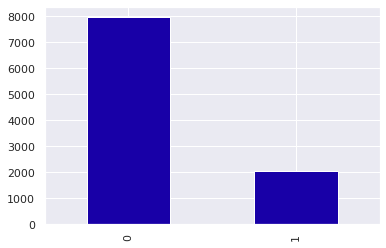

In [220]:
#visual representation of instances per class
df.Exited.value_counts().plot.bar()

The bar plot above show a clear visualization of the different between Class 0(the non Exited customers) and the Class 1(the Exited customers)

In [221]:
# Checking the info about the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


There is no null values in the dataset which is a good thing

In [222]:

# Checking the shape of the data
df.shape

(10000, 14)

We have 10,000 rows and 14 columns respectively

In [223]:
# Checking the statistical summary of the data
df.describe(include = 'all')

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000,10000.000000,10000,10000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
unique,NaN,NaN,2932,NaN,3,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,Smith,NaN,France,Male,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,32,NaN,5014,5457,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,5000.50000,1.569094e+07,NaN,650.528800,NaN,NaN,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,NaN,96.653299,NaN,NaN,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,NaN,350.000000,NaN,NaN,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,NaN,584.000000,NaN,NaN,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,NaN,652.000000,NaN,NaN,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,NaN,718.000000,NaN,NaN,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000


I observed that each column have NaN VALUES probably because most of the columns are string/object datatype

CrediScore, Age, Tenure, and EstimatedSalary are normaly distributed or close to

Age column have some outliers as 75th% quatile is  44 and maximum value is 92, we need to explore this further

The Balance column have some outliers as its 75th% quartile is 127644 and maximum is 250898. We can explore this further as well

NumberOfProduct, HasCrCard,IsActiveMemmber, Balance are not normally distributed and possibly right skewed

EstimateSalary too have some  outliers as the 75th% quartile is 149388 and the maximum value is 199992, exploring further is essential 

Top customers are males



In [224]:
# Checking the data types for each column
df.dtypes

RowNumber            int64
CustomerId           int64
Surname             object
CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

We have int, object and float datatypes respectively

In [225]:
# Checking the number of unique values in each columns
df.nunique()

RowNumber          10000
CustomerId         10000
Surname             2932
CreditScore          460
Geography              3
Gender                 2
Age                   70
Tenure                11
Balance             6382
NumOfProducts          4
HasCrCard              2
IsActiveMember         2
EstimatedSalary     9999
Exited                 2
dtype: int64

In [226]:
# Dropping RowNumber, CustomerId and Surname
# RowNumber is just a unique row number for each customers, therefore it doesnt have any effect on the model prediction
# CustomerId is also a unique Id for each customers, and i will not need it for my model
# Surname is not needed for my model prediction

df.drop(columns ='RowNumber', inplace = True)
df.drop(columns ='CustomerId', inplace = True)
df.drop(columns = 'Surname', inplace = True)






I observe that Rownumber are just the row numbers for each customers

Also the CustomerId also are the unique ID for each customers and I will not need these columns for my model


In [227]:
# CHECKING FOR THE UNIQUE OF EACH CATEGORY FOR EACH CATEGORICAL VARIABLES
#Making a list of all catrgorical variables 
cat_col=['Geography', 'Gender','NumOfProducts',
       'HasCrCard', 'IsActiveMember','Exited']

#Printing number of count of each unique value in each column
for column in cat_col:
    print(df[column].value_counts())
    print('-'*50)

France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64
--------------------------------------------------
Male      5457
Female    4543
Name: Gender, dtype: int64
--------------------------------------------------
1    5084
2    4590
3     266
4      60
Name: NumOfProducts, dtype: int64
--------------------------------------------------
1    7055
0    2945
Name: HasCrCard, dtype: int64
--------------------------------------------------
1    5151
0    4849
Name: IsActiveMember, dtype: int64
--------------------------------------------------
0    7963
1    2037
Name: Exited, dtype: int64
--------------------------------------------------


From the Geography we can see that half of the customers are from france

We have more of Male customers as seen earlier in the statistical summary

Most of the customers have CrediCard

Most of the Customers Exited the Bank After all

# UNIVARIATE ANALYSIS

In [228]:
#  Boxplot and histogram for any input numerical variable

def histogram_boxplot(feature, figsize=(15,15), bins = None):
    """ Boxplot and histogram combined
    feature: 1-d feature array
    figsize: size of fig (default (9,8))
    bins: number of bins (default None / auto)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(nrows = 2, # Number of rows of the subplot grid= 2
                                           sharex = True, # x-axis will be shared among all subplots
                                           gridspec_kw = {"height_ratios": (.25, .75)}, 
                                           figsize = figsize 
                                           ) # creating the 2 subplots
    sns.boxplot(feature, ax=ax_box2, showmeans=True, color='violet') # boxplot will be created and a star will indicate the mean value of the column
    sns.distplot(feature, kde=F, ax=ax_hist2, bins=bins,palette="winter") if bins else sns.distplot(feature, kde=False, ax=ax_hist2) # For histogram
    ax_hist2.axvline(np.mean(feature), color='green', linestyle='--') # Add mean to the histogram
    ax_hist2.axvline(np.median(feature), color='black', linestyle='-') # Add median to the histogram

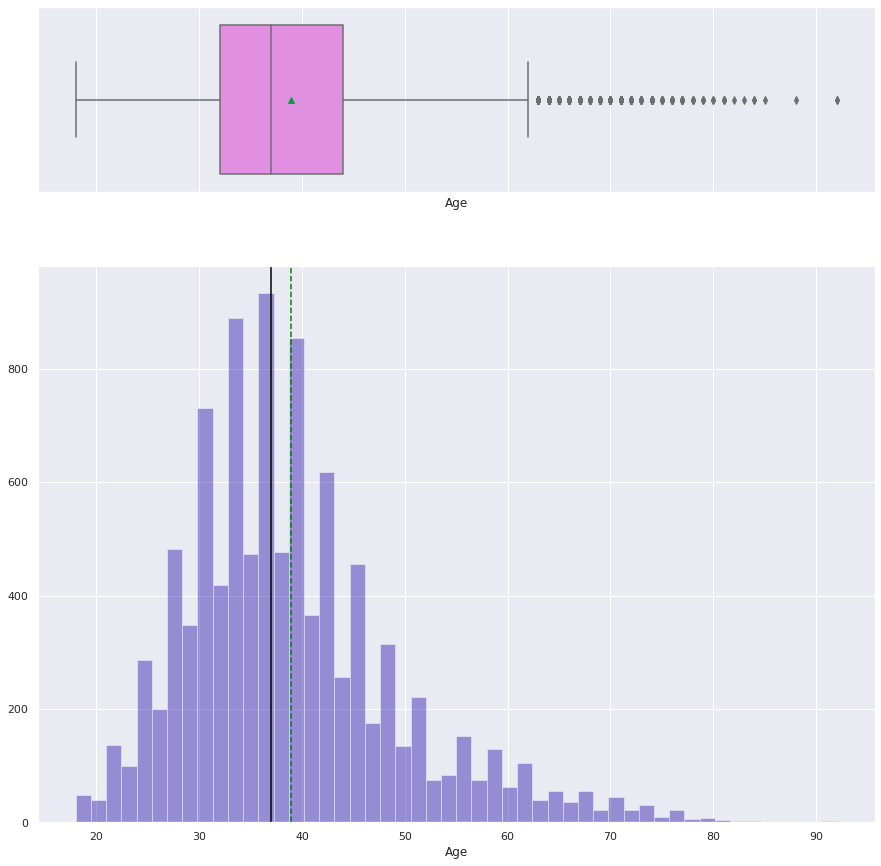

In [229]:
histogram_boxplot(df['Age'])

In [230]:
df[df['Age']>90]

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
6443,753,France,Male,92,3,121513.31,1,0,1,195563.99,0
6759,705,France,Male,92,1,126076.24,2,1,1,34436.83,0


In [231]:
(df['Exited']).value_counts()

0    7963
1    2037
Name: Exited, dtype: int64

In [232]:
df.drop(index=df[df.Age>90].index,inplace=True)


Age variable have outliers as seen in the boxplot above

Age is rightly skewed

Age is an important column as it can determine if some customers are old or maybe dead

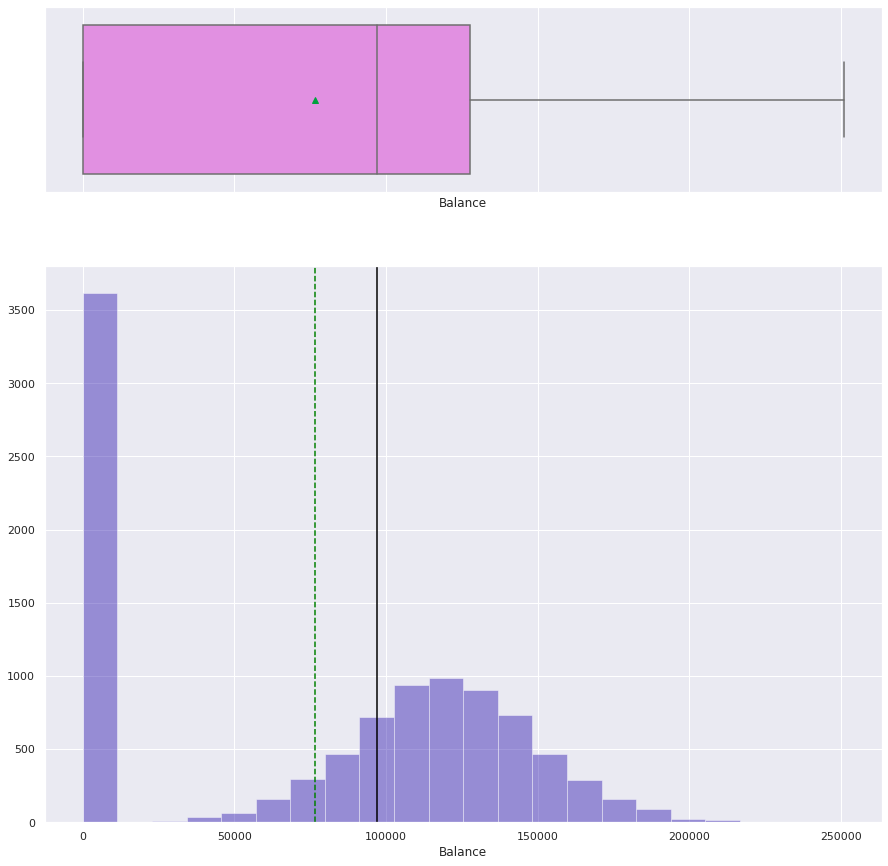

In [233]:
histogram_boxplot(df['Balance'])

The account Balance does not have outliers

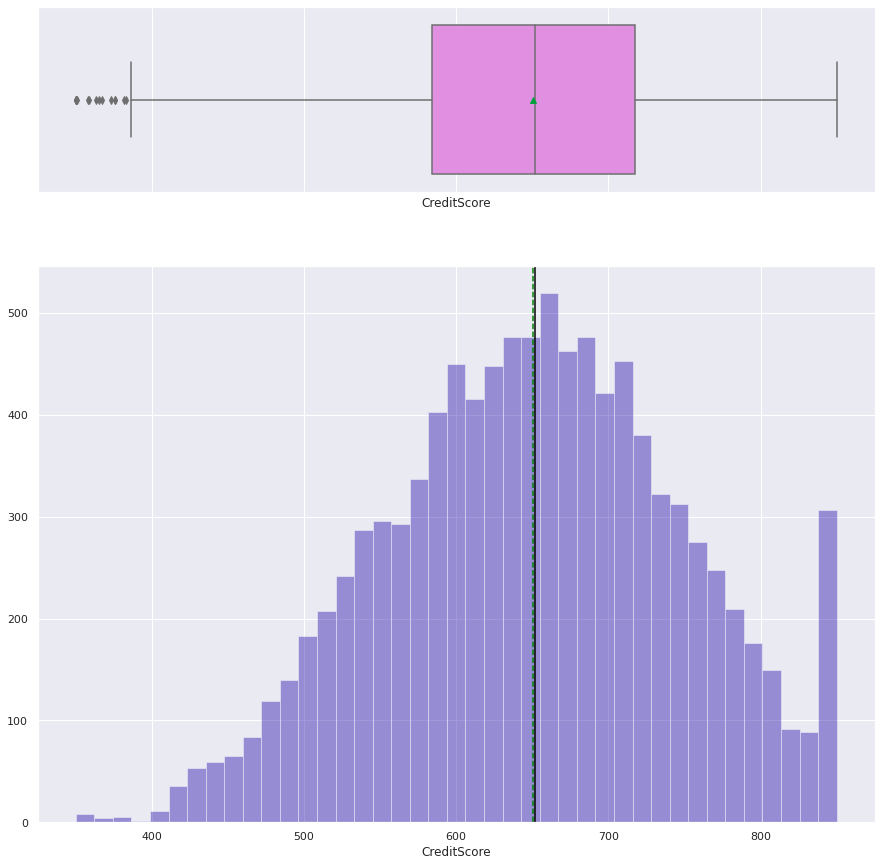

In [234]:
histogram_boxplot(df['CreditScore'])

CreditScore have some  Outliers 

Its close to normaly distributed

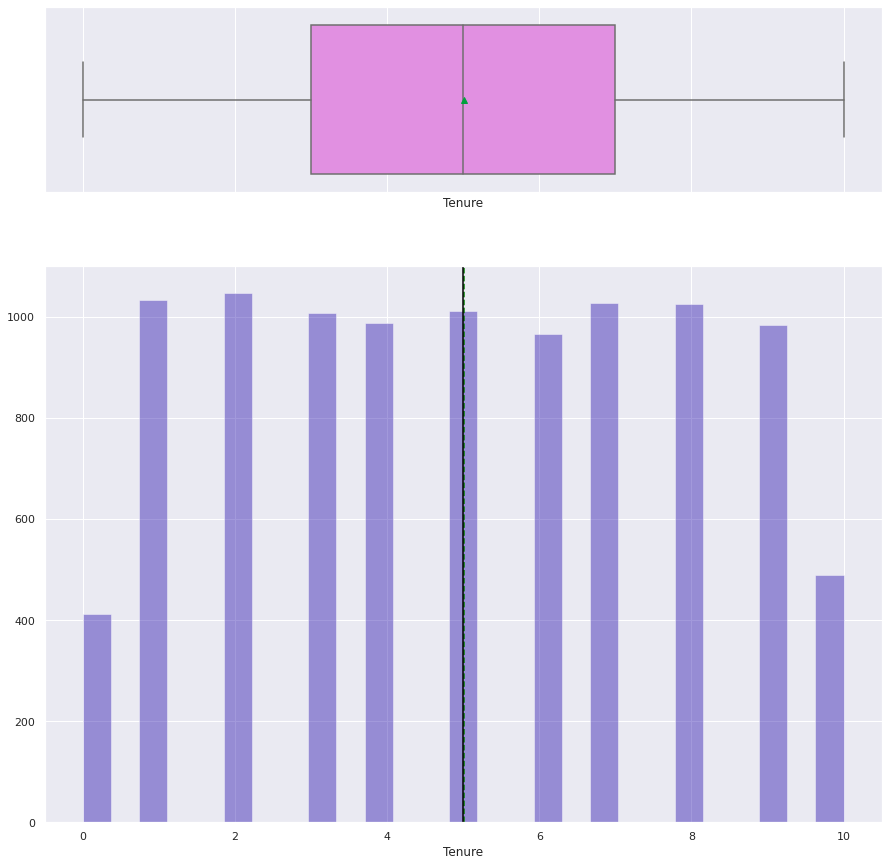

In [235]:
histogram_boxplot(df['Tenure'])

No Outliers

The mean is 5



# BIVARIATE ANALYSIS

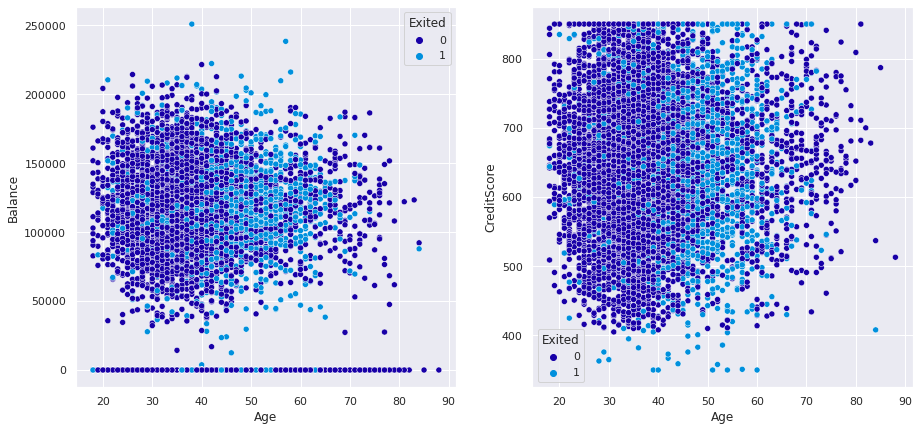

In [307]:
# viewing the relationship between HasCrCard, Age and, Balance and the Dependent variable(Exited)
_, ax =  plt.subplots(1, 2, figsize=(15, 7))
cmap = sns.cubehelix_palette(light=1, as_cmap=True)
sns.scatterplot(x = "Age", y = "Balance", hue = "Exited", cmap = cmap, sizes = (10, 200), data = df, ax=ax[0])
sns.scatterplot(x = "Age", y = "CreditScore", hue = "Exited", cmap = cmap, sizes = (10, 200), data = df, ax=ax[1])

Customer with CreditScore less then 400 have higher chances to churn

40 to 70 years old customers also have  higher chances to churn




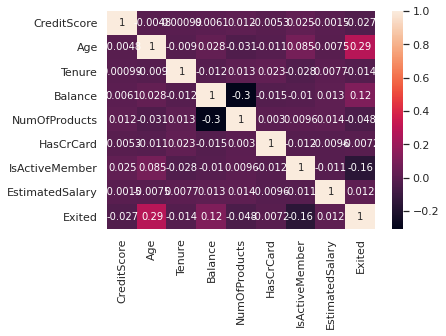

In [237]:
# Heatmap to view the correlation between the variables
sns.heatmap(df.corr(), annot = True)

There is a negative correlation between CreditScore and target variable(Exited), which means the CreditScore is part of the variables to consider wether the costomer exited the bank or not

There is a positive correlation between Age of a customer and the target variable, i.e old Age is an important factor to determine wether the customer will leave or not

Balance of the customer also have a positive correlation with the target variable

IsActiveMember also have a negative correlation with the target variable

And also Estimated Salary of the customer also have a positive correlation with wether the customer will leave or not



# I will like to use Stack plot to see the relationship between the Categorical variables

In [238]:
### Function to plot stacked bar charts for categorical columns
def stacked_plot(x,flag=True):
    sns.set(palette='nipy_spectral')
    tab1 = pd.crosstab(x,df['Exited'],margins=True)
    if flag==True:
        print(tab1)
        print('-'*120)
    tab = pd.crosstab(x,df['Exited'],normalize='index')
    tab.plot(kind='bar',stacked=True,figsize=(10,5))
    plt.legend(loc='lower left', frameon=False)
    plt.legend(loc="upper left", bbox_to_anchor=(1,1))
    plt.show()

Exited        0     1   All
HasCrCard                  
0          2331   613  2944
1          5630  1424  7054
All        7961  2037  9998
------------------------------------------------------------------------------------------------------------------------


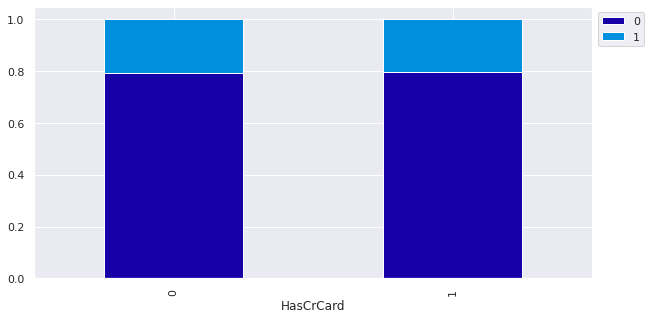

In [239]:
stacked_plot(df.HasCrCard)

5631 of Customers have Credit Card while, 2332 does not have. out of the customers with CreditCard, 1424 exited the bank while 613 of the customers without CreditCard also left 

Exited     0     1   All
Gender                  
Female  3404  1139  4543
Male    4557   898  5455
All     7961  2037  9998
------------------------------------------------------------------------------------------------------------------------


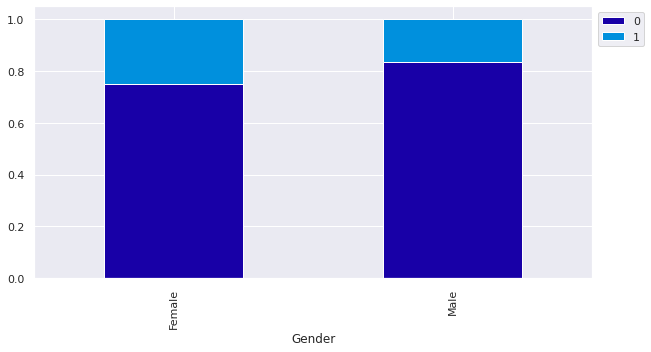

In [240]:
stacked_plot(df.Gender)

Although, Male Customers are more than Female Customers, We have a large number of Female customers that Exited the Bank Compare to Male

Exited        0     1   All
Geography                  
France     4202   810  5012
Germany    1695   814  2509
Spain      2064   413  2477
All        7961  2037  9998
------------------------------------------------------------------------------------------------------------------------


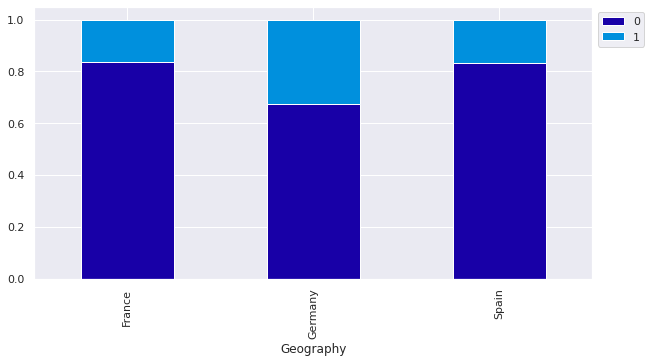

In [241]:
stacked_plot(df.Geography)

Most of the Exited Customers are from Germany

Largest number of Customers are from France, and only few of them Exited the Bank

Exited            0     1   All
NumOfProducts                  
1              3674  1409  5083
2              4241   348  4589
3                46   220   266
4                 0    60    60
All            7961  2037  9998
------------------------------------------------------------------------------------------------------------------------


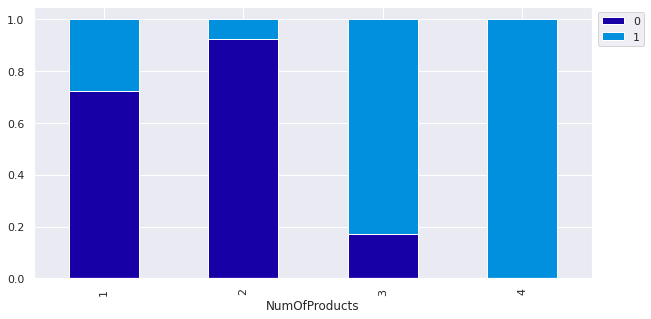

In [242]:
stacked_plot(df.NumOfProducts)

Out of the 60 Customers with 4 Products/Account, none of them stayed

The lower the number of Product, the lower the chances of Exiting the bank

Most Customers have two Product/Account with the bank and also customers with two product have the lowest number of Exited

Exited             0     1   All
IsActiveMember                  
0               3547  1302  4849
1               4414   735  5149
All             7961  2037  9998
------------------------------------------------------------------------------------------------------------------------


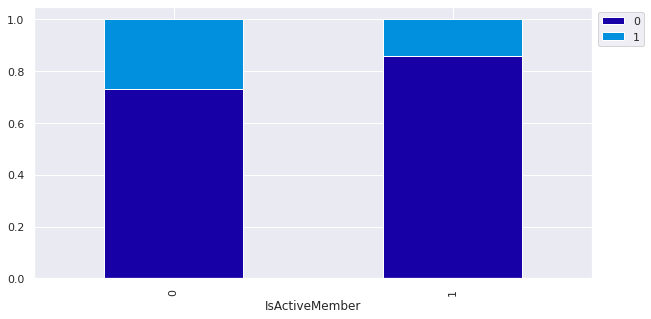

In [243]:
stacked_plot(df.IsActiveMember)

The NonActive number have the highest rate of Exit

only 735 of the ActiveMember Exited the Bank

In [244]:
# Seperating the Target variable from other variables
x = df.drop(columns = 'Exited')
y = df['Exited']

In [245]:
x.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,Female,42,2,0.00,1,1,1,101348.88
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58
2,502,France,Female,42,8,159660.80,3,1,0,113931.57
3,699,France,Female,39,1,0.00,2,0,0,93826.63
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10


In [246]:
y.head()

0    1
1    0
2    1
3    0
4    0
Name: Exited, dtype: int64

# HANDLING THE CATEGORICAL VARIABLES

In [247]:
Cat = LabelEncoder()
x['Gender'] = Cat.fit_transform(x['Gender'])

In [248]:
Cat = LabelEncoder()
x['Geography'] = Cat.fit_transform(x['Geography'])
x.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,0,0,42,2,0.00,1,1,1,101348.88
1,608,2,0,41,1,83807.86,1,0,1,112542.58
2,502,0,0,42,8,159660.80,3,1,0,113931.57
3,699,0,0,39,1,0.00,2,0,0,93826.63
4,850,2,0,43,2,125510.82,1,1,1,79084.10


In [249]:
x = pd.get_dummies(x, drop_first = True, columns = ['Geography'])
x.head()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_1,Geography_2
0,619,0,42,2,0.00,1,1,1,101348.88,0,0
1,608,0,41,1,83807.86,1,0,1,112542.58,0,1
2,502,0,42,8,159660.80,3,1,0,113931.57,0,0
3,699,0,39,1,0.00,2,0,0,93826.63,0,0
4,850,0,43,2,125510.82,1,1,1,79084.10,0,1


# Feature scaling and train test split

In [250]:
# Splitting the dataset into the Training and Test set
x_train, x_test,y_train,y_test = train_test_split(x,y, test_size = 0.2, random_state = 0, stratify = y)

In [251]:
# Feature scaling so all the all input will be at a comparable range
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)


In [252]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(7998, 11)
(2000, 11)
(7998,)
(2000,)


# MODEL BUILDING(ANN)

In [253]:
import keras
import sys
from keras.models import Sequential
from keras.layers import Dense # it is use to create layers in NAN

In [254]:
# Initialize the ANN, defining it as a sequence
model = Sequential()


# Adding the input layer


In [255]:
# Input Layer
# Input_dim is the number of nodes in the input layer for the hidden layer
# Kernel_initializer will randomly initialize the weight with small numbers close to zero, according to uniform distribution
model.add(Dense(units = 6, kernel_initializer='uniform',activation ='relu',input_dim = 11))

In [256]:
# The second layer
model.add(Dense(units = 6, kernel_initializer ='uniform', activation = 'relu'))

In [257]:
# Adding the output layer, the output layer will only have one neuron as the output layer is binary
model.add(Dense(units = 1, kernel_initializer = 'uniform',activation = 'sigmoid'))

In [258]:
# Loss function to measure the error found and compare the predicted value with the actual value
# Optimizer is the algorithm to use to find the best weight
# Loss: loss function within the optimizer algorithm
# Metric: criteria to evaluate the model

model.compile(optimizer = 'adam', loss = "binary_crossentropy",metrics = ["accuracy"])


In [259]:
# THE SUMMARY OF THE MODEL
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_12 (Dense)             (None, 6)                 72        
_________________________________________________________________
dense_13 (Dense)             (None, 6)                 42        
_________________________________________________________________
dense_14 (Dense)             (None, 1)                 7         
Total params: 121
Trainable params: 121
Non-trainable params: 0
_________________________________________________________________


# Now, we are going to do the followings:
1. Back Propagation: error calculated from output back to the input layer and the weight will get updated according to their error

3. Reinforcement learning: updating weight at each observation

2. epochs;  how many times you train your model

In [262]:
# Fitting the ANN to the training set
# batch_size is the number of observations after the weight is updated


history = model.fit(x_train ,y_train,batch_size = 10, epochs = 200,validation_split = 0.2)

Epoch 1/200
640/640 [==============================] - 1s 2ms/step - loss: 0.3967 - accuracy: 0.8399 - val_loss: 0.4031 - val_accuracy: 0.8356
Epoch 2/200
640/640 [==============================] - 1s 2ms/step - loss: 0.3965 - accuracy: 0.8404 - val_loss: 0.4011 - val_accuracy: 0.8369
Epoch 3/200
640/640 [==============================] - 1s 2ms/step - loss: 0.3964 - accuracy: 0.8407 - val_loss: 0.4012 - val_accuracy: 0.8331
Epoch 4/200
640/640 [==============================] - 1s 2ms/step - loss: 0.3964 - accuracy: 0.8376 - val_loss: 0.4012 - val_accuracy: 0.8350
Epoch 5/200
640/640 [==============================] - 1s 2ms/step - loss: 0.3961 - accuracy: 0.8392 - val_loss: 0.4026 - val_accuracy: 0.8344
Epoch 6/200
640/640 [==============================] - 1s 2ms/step - loss: 0.3967 - accuracy: 0.8407 - val_loss: 0.4015 - val_accuracy: 0.8363
Epoch 7/200
640/640 [==============================] - 1s 2ms/step - loss: 0.3962 - accuracy: 0.8392 - val_loss: 0.4014 - val_accuracy: 0.8356

# After running 200 Epoch on the training set,  we got an accuracy of about 86%

### Evaluation
Keras model can be evaluated with evaluate() function

Evaluation results are contained in a list



In [263]:
score = model.evaluate(x_test, y_test)

63/63 [==============================] - 0s 2ms/step - loss: 0.3406 - accuracy: 0.8610


In [264]:
print(score)


[0.3406338691711426, 0.8610000014305115]


In [265]:
# Predicting the Test set results
y_pred = model.predict(x_test)
#Threshold of 50%
y_pred = (y_pred > 0.5)
y_pred


array([[False],
       [False],
       [False],
       ...,
       [False],
       [ True],
       [False]])

According to the model, the first five(4) customers will not Exit/Leave the bank

In [266]:
# Code to make/define confusion matrix
def make_confusion_matrix(cf,
                          group_names=None,
                          categories='auto',
                          count=True,
                          percent=True,
                          cbar=True,
                          xyticks=True,
                          xyplotlabels=True,
                          sum_stats=True,
                          figsize=None,
                          cmap='Blues',
                          title=None):
    '''
    This function will make a pretty plot of an sklearn Confusion Matrix cm using a Seaborn heatmap visualization.
    Arguments
    '''


    # CODE TO GENERATE TEXT INSIDE EACH SQUARE
    blanks = ['' for i in range(cf.size)]

    if group_names and len(group_names)==cf.size:
        group_labels = ["{}\n".format(value) for value in group_names]
    else:
        group_labels = blanks

    if count:
        group_counts = ["{0:0.0f}\n".format(value) for value in cf.flatten()]
    else:
        group_counts = blanks

    if percent:
        group_percentages = ["{0:.2%}".format(value) for value in cf.flatten()/np.sum(cf)]
    else:
        group_percentages = blanks

    box_labels = [f"{v1}{v2}{v3}".strip() for v1, v2, v3 in zip(group_labels,group_counts,group_percentages)]
    box_labels = np.asarray(box_labels).reshape(cf.shape[0],cf.shape[1])


    # CODE TO GENERATE SUMMARY STATISTICS & TEXT FOR SUMMARY STATS
    if sum_stats:
        #Accuracy is sum of diagonal divided by total observations
        accuracy  = np.trace(cf) / float(np.sum(cf))

        #if it is a binary confusion matrix, show some more stats
        if len(cf)==2:
            #Metrics for Binary Confusion Matrices
            precision = cf[1,1] / sum(cf[:,1])
            recall    = cf[1,1] / sum(cf[1,:])
            f1_score  = 2*precision*recall / (precision + recall)
            stats_text = "\n\nAccuracy={:0.3f}\nPrecision={:0.3f}\nRecall={:0.3f}\nF1 Score={:0.3f}".format(
                accuracy,precision,recall,f1_score)
        else:
            stats_text = "\n\nAccuracy={:0.3f}".format(accuracy)
    else:
        stats_text = ""


    # SET FIGURE PARAMETERS ACCORDING TO OTHER ARGUMENTS
    if figsize==None:
        #Get default figure size if not set
        figsize = plt.rcParams.get('figure.figsize')

    if xyticks==False:
        #Do not show categories if xyticks is False
        categories=False


    # MAKE THE HEATMAP VISUALIZATION
    plt.figure(figsize=figsize)
    sns.heatmap(cf,annot=box_labels,fmt="",cmap=cmap,cbar=cbar,xticklabels=categories,yticklabels=categories)

    if xyplotlabels:
        plt.ylabel('True label')
        plt.xlabel('Predicted label' + stats_text)
    else:
        plt.xlabel(stats_text)
    
    if title:
        plt.title(title)

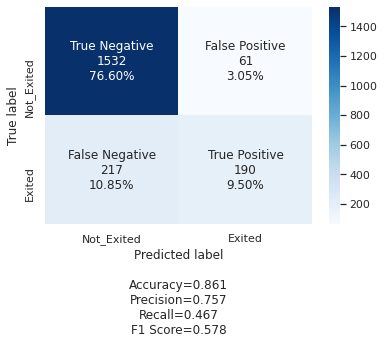

In [267]:
## Confusion Matrix on unsee test set
import seaborn as sn
y_pred1 = model.predict(x_test)
for i in range(len(y_test)):
    if y_pred1[i]>0.5: # optimal threshold
        y_pred1[i]=1 
    else:
        y_pred1[i]=0



cm=confusion_matrix(y_test, y_pred1)
labels = ['True Negative','False Positive','False Negative','True Positive']
categories = [ 'Not_Exited','Exited']
make_confusion_matrix(cm, 
                      group_names=labels,
                      categories=categories, 
                      cmap='Blues')


## Model evaluation criterion

### Model can make wrong predictions as:
* Predicting that a customer will Exit the bank but did not Exited 
* Predicting a customer will not Exit the bank but Exited 

### Which case is more important? 
* Predicting that Customer will not Exit/Leave but the Customer Left/Exit, that will be a loss for the bank

### How to reduce this loss i.e need to reduce False Negative?
* I WILL BE FOCUSING ON MINIMIZING THE NUMBER OF FALSE NEGATIVE i.e Maximizing the  RECALL because if i predict that customers will not exit but later exit, that will cause more problem to the bank as the bank is interested in knowing if customers will leave or not in the next 6 months


From above, we can see that the model have predicted 1532(76.60%) customers correctly that they will not leave the bank, that is TN and predicted 217(10.85%) wrongly i.e FalseNegative(predicting that customers will not exit but exited)

Also, we are able to predict 190(9.50%) customers correctly as TruePositive(predicting that customer will exit and exited) and 61(3.05%) wrongly as FalsePositive(Predicting that customer will exit but did not Exited)


# Conclusion
I have to find a way to reduce the number of false negative

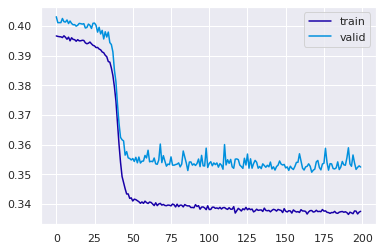

In [268]:
# Capturing learning history per epoch
hist  = pd.DataFrame(history.history)
hist['epoch'] = history.epoch

# Plotting accuracy at different epochs
plt.plot(hist['loss'])
plt.plot(hist['val_loss'])
plt.legend(("train" , "valid") , loc =0)


We can see clearly that the model do well on the train set as the error really reduced, but its overfitting the Validation as the error increased drastically and that is not a good model

### Evaluation
Keras model can be evaluated with evaluate() function

Evaluation results are contained in a list



In [269]:
score = model.evaluate(x_test, y_test)


63/63 [==============================] - 0s 2ms/step - loss: 0.3406 - accuracy: 0.8610


The model achieved an accuracy of 86%

# Model Evaluations

# Making another architecture to get a better recall

*Early stopping:** 

During training, the model is evaluated on a holdout validation dataset after each epoch. If the performance of the model on the validation dataset starts to degrade or no improvement (e.g. loss begins to increase or accuracy begins to decrease), then the training process is stopped after the certian interations.The model at the time that training is stopped is then used and is known to have good generalization performance.

This procedure is called “early stopping” and is perhaps one of the oldest and most widely used forms of neural network regularization.



**Dropout**

Dropout is a regularization technique for neural network models proposed by Srivastava, et al. in their 2014 paper Dropout: A Simple Way to Prevent Neural Networks from Overfitting. Dropout is a technique where randomly selected neurons are ignored during training. They are “dropped-out” randomly.


In [297]:
#Training Multi-layer perceptron with 2 hidden layers

#adding earlystopping callback
es= keras.callbacks.EarlyStopping(monitor='val_loss',
                              min_delta=0,
                              patience=15,
 
                             verbose=0, mode='min', restore_best_weights= True)
Model2 = Sequential()
#Initializing the weights uisng hue_normal 
Model2.add(Dense(units = 6, input_dim = 11, kernel_initializer='he_normal', activation='relu'))
Model2.add(Dropout(0.5)) #Adding Dropout to prevent overfitting
Model2.add(Dense(units = 6, kernel_initializer='he_normal', activation='relu'))
Model2.add(Dropout(0.5)) #Adding Dropout to prevent overfitting
Model2.add(Dense(units = 1, kernel_initializer='he_normal', activation='sigmoid'))

Model2.compile(Adam(lr=0.001), loss='binary_crossentropy', metrics=['accuracy'])
    
his_mod2= Model2.fit(x_train, y_train, validation_split=0.2, batch_size=10, epochs=200, callbacks=[es], shuffle=True, verbose=1)




Epoch 1/200
640/640 [==============================] - 3s 3ms/step - loss: 0.9928 - accuracy: 0.6438 - val_loss: 0.5357 - val_accuracy: 0.8125
Epoch 2/200
640/640 [==============================] - 1s 2ms/step - loss: 0.5885 - accuracy: 0.7711 - val_loss: 0.4971 - val_accuracy: 0.8119
Epoch 3/200
640/640 [==============================] - 1s 2ms/step - loss: 0.5382 - accuracy: 0.7811 - val_loss: 0.4827 - val_accuracy: 0.8119
Epoch 4/200
640/640 [==============================] - 1s 2ms/step - loss: 0.5136 - accuracy: 0.7901 - val_loss: 0.4740 - val_accuracy: 0.8119
Epoch 5/200
640/640 [==============================] - 1s 2ms/step - loss: 0.5112 - accuracy: 0.7831 - val_loss: 0.4632 - val_accuracy: 0.8119
Epoch 6/200
640/640 [==============================] - 1s 2ms/step - loss: 0.5044 - accuracy: 0.7838 - val_loss: 0.4550 - val_accuracy: 0.8119
Epoch 7/200
640/640 [==============================] - 1s 2ms/step - loss: 0.4861 - accuracy: 0.7931 - val_loss: 0.4452 - val_accuracy: 0.8119

Now we have accuracy of about 85%

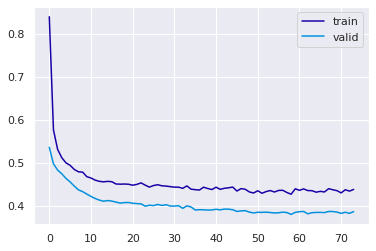

In [298]:
# Capturing learning history per epoch
hist  = pd.DataFrame(his_mod2.history)
hist['epoch'] = his_mod2.epoch

# Plotting accuracy at different epochs
plt.plot(hist['loss'])
plt.plot(hist['val_loss'])
plt.legend(("train" , "valid") , loc =0)


Now, the validation test is better than the previous one

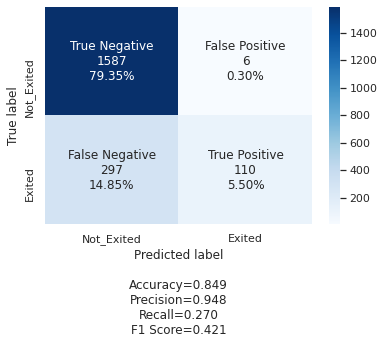

In [299]:
## Confusion Matrix on unsee test set
import seaborn as sn
y_pred1 = Model2.predict(x_test)
for i in range(len(y_test)):
    if y_pred1[i]>0.5:
        y_pred1[i]=1 
    else:
        y_pred1[i]=0



cm2=confusion_matrix(y_test, y_pred1)
labels = ['True Negative','False Positive','False Negative','True Positive']
categories = [ 'Not_Exited','Exited']
make_confusion_matrix(cm2, 
                      group_names=labels,
                      categories=categories, 
                      cmap='Blues')

As seen above , the precision has really improved but the recall got worse

### Weighted loss to account for large class imbalance in train dataset
- we will adjust the class imbalance by giving additional weight to the loss associated to errors made on fraudulent transaction detection.

We will use our first ANN model and apply weighted loss


 Let's review the process:

In [300]:
from sklearn.utils import class_weight
class_weights = class_weight.compute_class_weight('balanced', np.unique(y_train), np.array([y_train.iloc[i] for i in range(len(y_train))]))
class_weights = dict(enumerate(class_weights))
class_weights

{0: 0.6279836683417085, 1: 2.453374233128834}

In [302]:
model.fit(x_train,y_train,batch_size=15,epochs=10, class_weight=class_weights, shuffle=True)

Epoch 1/10
534/534 [==============================] - 1s 2ms/step - loss: 0.4650 - accuracy: 0.7847
Epoch 2/10
534/534 [==============================] - 1s 2ms/step - loss: 0.4643 - accuracy: 0.7882
Epoch 3/10
534/534 [==============================] - 1s 3ms/step - loss: 0.4646 - accuracy: 0.7856
Epoch 4/10
534/534 [==============================] - 1s 2ms/step - loss: 0.4642 - accuracy: 0.7857
Epoch 5/10
534/534 [==============================] - 1s 2ms/step - loss: 0.4639 - accuracy: 0.7811
Epoch 6/10
534/534 [==============================] - 1s 2ms/step - loss: 0.4642 - accuracy: 0.7864
Epoch 7/10
534/534 [==============================] - 1s 3ms/step - loss: 0.4641 - accuracy: 0.7858
Epoch 8/10
534/534 [==============================] - 1s 2ms/step - loss: 0.4643 - accuracy: 0.7851
Epoch 9/10
534/534 [==============================] - 1s 3ms/step - loss: 0.4636 - accuracy: 0.7869
Epoch 10/10
534/534 [==============================] - 1s 2ms/step - loss: 0.4656 - accuracy: 0.7817

In [303]:
score_weighted = model.evaluate(x_test, y_test)

63/63 [==============================] - 0s 2ms/step - loss: 0.4508 - accuracy: 0.7850


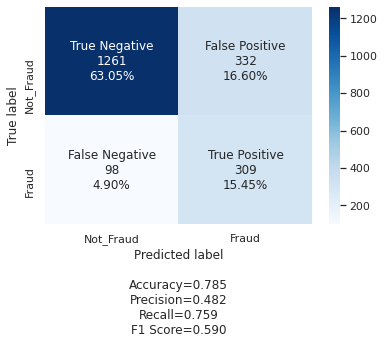

In [304]:
# Plottint the confusion matric
## Confusion Matrix on unsee test set
import seaborn as sn
y_pred1 = model.predict(x_test)
for i in range(len(y_test)):
    if y_pred1[i]>0.5:
        y_pred1[i]=1 
    else:
        y_pred1[i]=0



cm2=confusion_matrix(y_test, y_pred1)
labels = ['True Negative','False Positive','False Negative','True Positive']
categories = [ 'Not_Fraud','Fraud']
make_confusion_matrix(cm2, 
                      group_names=labels,
                      categories=categories, 
                      cmap='Blues')

Now it turns out that the Recall has really improved compare to the first two models but the precision has gone bad

## Conclusion

we can choose the last model with weighted  loss as our  final model